Back to the [README](./README.md)

Back to the [fitting notebook](./05-fitting-df_low.ipynb)

--------------------

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

from setup import df_low, Col

--------------------

# Linear Regression Using SciKit-Learn

In [2]:
# Set up the data
x = df_low[Col.age2].copy()    # age**2
y = df_low[Col.charges].copy() # charges

# Create a model with the data
model = LinearRegression().fit(x, y)

# Quickly check the result
print(f'R^2:\t\t{model.score(x, y)}')
print(f'Intercept:\t{model.intercept_[0]}')
print(f'Slope:\t\t{model.coef_[0, 0]}')

R^2:		0.9581524960085102
Intercept:	1160.107215636146
Slope:		3.3639813030572325


We find that we might be dealing with the function
$$
c_{1, r}(a) = 3.3639813030572325 \cdot a^2 + 1160.107215636146 \cdot (1 + r)
$$
where $r$ is the random influence that we allow.  Note that there is no linear term in this version.
This is due to our function being in its local extremum form, $f(x) = m (x - x_E)^2 + f_E$.
For $x = x_E (= 0)$, the function takes its extreme value, $f(x_E) = f_E$.

Let's plot the regression line over the data frame:

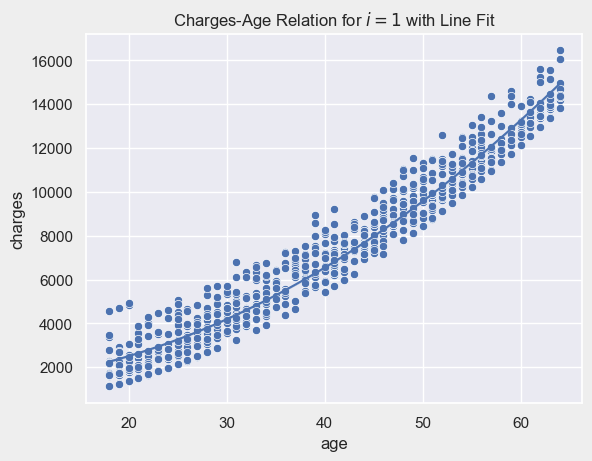

In [3]:
df_low[Col.line] = model.predict(x).flatten()
sns.scatterplot(data=df_low, x=Col.age, y=Col.charges)
sns.lineplot(data=df_low, x=Col.age, y=Col.line)
plt.title('Charges-Age Relation for $i=1$ with Line Fit')
plt.show()

This looks remarkably well; the characteristics of the data seem to have been captured really nicely!

A *disadvantage* of using `sklearn` is that we do not get deeper information on our regression
result in a convenient way (compared to the other two examples), like errors for the slope and
the offset.  Thus, we cannot compute confidence ranges moving forward, meaning that we are
basically done here.

So, let us move on to the [next](./07-linear-regression-using-statsmodels-api.ipynb) package.

--------------------

Back to the [README](./README.md)

Back to the [fitting notebook](./05-fitting-df_low.ipynb)

To the [next notebook](./07-linear-regression-using-statsmodels-api.ipynb)